In [29]:
from matplotlib_venn import venn3, venn3_circles,venn3_unweighted,venn2_unweighted
from matplotlib import pyplot as plt
import pandas as pd
import os
from astropy.io import fits
import numpy as np

In [2]:
dirCats=r'/mnt/Data/Work/GitHub/COSMOS_SOM/Datasets_Seq'
fileKB=r'03_COSMOS_SpectrZ_Seq.csv'
fileDEIMOS=r'03_COSMOS_DEIMOS_Seq.csv'
fileRun=r'01_COSMOS2015_Seq.csv'

In [3]:
KB=pd.read_csv(os.path.join(dirCats,fileKB))
print('KB', len(KB))
Deimos=pd.read_csv(os.path.join(dirCats,fileDEIMOS))
print('Deimos', len(Deimos))
run=pd.read_csv(os.path.join(dirCats,fileRun))
print('Run', len(run))

KB 33316
Deimos 5412
Run 518404


Text(-70, 70, 'KB')

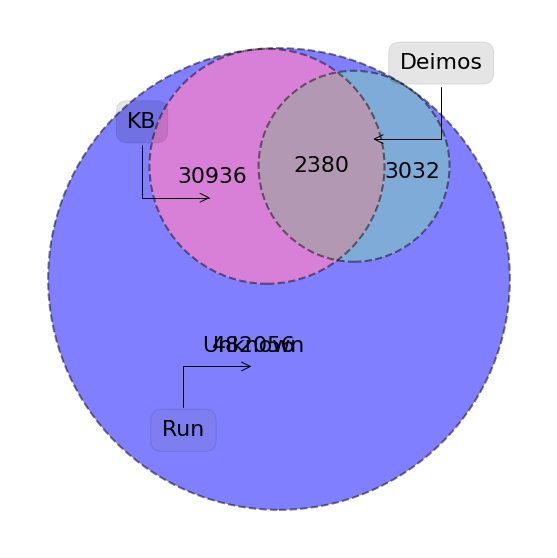

In [63]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
plt.rcParams.update({'font.size': 22})
ax=venn3_unweighted([set(KB['Seq']), set(Deimos['Seq']), set(run['Seq'])], 
      set_labels = ('', '', ''), alpha = 0.5,subset_areas=(0,0,0,13,3,1.3,2))
v = venn3(subsets=(0,0,0,13,3,1.3,2),alpha=0,set_labels=('','',''))
venn3_circles(subsets=(0,0,0,13,3,1.3,2),alpha=0.5,linestyle='dashed')
#v.get_label_by_id('100').set_text('')
#v.get_label_by_id('010').set_text('')
v.get_label_by_id('001').set_text('')
v.get_label_by_id('011').set_text('')
v.get_label_by_id('101').set_text('')
v.get_label_by_id('111').set_text('')
v.get_label_by_id('001').set_text('Unknown')
plt.annotate('Run', xy=v.get_label_by_id('001').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='angle',color='black'))
plt.annotate('Deimos', xy=v.get_label_by_id('011').get_position() - np.array([0.1, -0.08]), xytext=(70,70),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='black', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='angle',color='black'))
plt.annotate('KB', xy=v.get_label_by_id('101').get_position() - np.array([0, 0.05]), xytext=(-70,70),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='black', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='angle',color='black'))

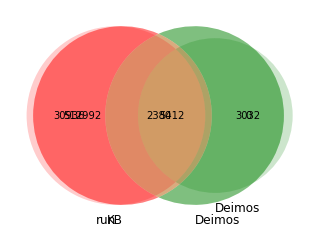

In [35]:
venn2_unweighted([set(KB['Seq']), set(Deimos['Seq'])], 
      set_labels = ('KB', 'Deimos'), alpha = 0.5)
venn2_unweighted([set(run['Seq']), set(Deimos['Seq'])], 
      set_labels = ('run', 'Deimos'), alpha = 0.2,subset_areas=(0.3,0.2,0.1))

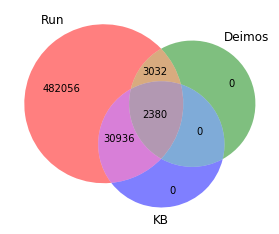

In [116]:
venn3_unweighted([set(run['Seq']),set(Deimos['Seq']),set(KB['Seq'])], 
      set_labels = ('Run','Deimos','KB'), alpha = 0.5,subset_areas=(10,3,3,1,5,5,1))

#c = venn3_circles((10,0,3,3,5,5,0), linestyle='dashed')
#c[1].set_lw(1)
#c[2].set_lw(1)
#c[0].set_lw(2)
#c[0].set_ls('dotted')
#c[0].set_hatch('///')
#c[0]

In [55]:
print(venn3_unweighted.__doc__)


    The version of venn3 without area-weighting.
    It is implemented as a wrapper around venn3. Namely, venn3 is invoked as usual, but with all subset areas
    set to 1. The subset labels are then replaced in the resulting diagram with the provided subset sizes.
    
    The parameters are all the same as that of venn2.
    In addition there is a subset_areas parameter, which specifies the actual subset areas.
    (it is (1, 1, 1, 1, 1, 1, 1) by default. You are free to change it, within reason).
    


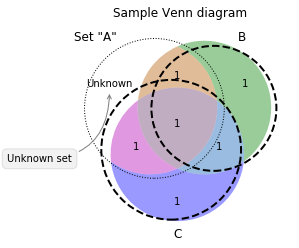

In [35]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()